# Unlocking Potential: Modeling Transferability and Future Performance of D1 Athletes

#### Statement of the Problem We are Addressing

The problem we are addressing revolves around assessing the potential transferability of basketball players to the Division 1 UCSD basketball team. Succesfully recruiting basketball players for a college team can be very challenging. Evaluating a player's skill set, such as shooting, offense, defense, and teamwork, requires comprehensive knowledge and experience from the recruiters. Limited scouting resources, uncertainties regarding long-term development, and competition from other colleges make the recruitment process highly competitive and prone to errors. By leveraging past statistics of both the players under consideration and those who have successfully transitioned to D1 teams, we aim to develop a predictive model that can be used to ease these concerns. This model will help evaluate the suitability of prospective transfers based on their performance metrics, thereby aiding in the selection process and ensuring that the chosen players are a good fit for the team.

#### Source of the Data

The data used for recruitment was obtained by scraping information from individual team websites for both D1 and D2 colleges. This included gathering data from each team's roster as well as individual player statistics. The process involved navigating through multiple URL schemes to accommodate various types of websites.

Here is an example of a website containing the data we are interested in scraping: https://ucsdtritons.com/sports/mens-basketball/stats/2022-23

The scraping notebook is stored separately for easier and faster access. The resulting datasets are shown below.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,F,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,G,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,G,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,G,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,G,Academy of Art University,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15638,Ahmir Crum,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15639,Alfonzo Hilliard,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15640,Avery Jones,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15641,Griffin Neville,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023


In [3]:
d1_data = pd.read_csv("d1data.csv")
d1_data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Jaylen Franklin,1,1,30,30.0,5,9,0.556,0,1,...,8,8.0,3,1,4,1,0,G,Abilene Christian University,2018-2019
1,Jaren Lewis,1,1,31,31.0,5,13,0.385,4,8,...,1,1.0,1,3,2,1,0,F,Abilene Christian University,2018-2019
2,Damien Daniels,1,1,31,31.0,3,9,0.333,2,7,...,2,2.0,0,1,0,0,1,G,Abilene Christian University,2018-2019
3,Payten Ricks,23,23,503,21.9,113,239,0.473,29,77,...,107,4.7,71,22,46,16,22,G,Abilene Christian University,2018-2019
4,Tobias Cameron,33,8,504,15.3,25,61,0.410,16,36,...,40,1.2,47,20,18,14,1,G,Abilene Christian University,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,0.8,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023
11148,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0.3,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023
11149,Gage Gomez,10,0,18,1.8,0,2,0.000,0,1,...,2,0.2,0,2,1,0,0,G,University of California – Santa Barbara,2022-2023
11150,Henry Hartwell,2,0,4,2.0,0,1,0.000,0,1,...,1,0.5,0,0,1,0,0,G,University of California – Santa Barbara,2022-2023


In [4]:
schools = pd.read_csv("d2_basketball_schools.csv")
schools

,Name,Conference,Division,Reclass Division,Public/Private,HBCU,State
0,Academy of Art University,Pacific West Conference,II,NaN,Private,No,CA
1,Adams State University,Rocky Mountain Athletic Conference,II,NaN,Public,No,CO
2,Adelphi University,Northeast-10 Conference,II,NaN,Private,No,NY
3,Albany State University (Georgia),Southern Intercol. Ath. Conf.,II,NaN,Public,Yes,GA
4,Allen University,Southern Intercol. Ath. Conf.,II,NaN,Private,Yes,SC
...,...,...,...,...,...,...,...
309,Wilmington University (Delaware),Central Atlantic Collegiate Conference,II,NaN,Private,No,DE
310,Wingate University,South Atlantic Conference,II,NaN,Private,No,NC
311,Winona State University,Northern Sun Intercollegiate Conference,II,NaN,Public,No,MN
312,Winston-Salem State University,Central Intercollegiate Athletic Association,II,NaN,Public,Yes,NC


In [5]:
d1_schools = pd.read_excel("division1schools.xlsx")
d1_schools

,Conference,Division,School
0,Western Athletic Conference,NCAA D1,Abilene Christian University
1,Southwestern Athletic Conference,NCAA D1,Alabama A&M University
2,Southwestern Athletic Conference,NCAA D1,Alabama State University
3,Southwestern Athletic Conference,NCAA D1,Alcorn State University
4,Patriot League,NCAA D1,American University
...,...,...,...
358,Southern Conference,NCAA D1,Wofford College
359,Horizon League,NCAA D1,Wright State University
360,Big East Conference,NCAA D1,Xavier University
361,Ivy League,NCAA D1,Yale University


#### Description of the Data

Our data includes statistics on basketball player performance. Each row represents an observation for the performance of one player during a game. The quantitative metrics are GP, GS, MIN, MIN/G, FGM, FGA, FG%, 3PT, 3PTA, 3PT%, FT, FTA, FT%, PTS, AVG, OFF REB, DEF REB, REB, REB/G, PF, AST, TO, STL, BLK, and Year. The categorical metrics are Position and Team. A summary of these variables is provided below:

**GP:** Games Played  
**GS:** Games Started  
**MIN:** Minutes Played  
**FGM:** Field Goals Made  
**FGA:** Field Goals Attempted  
**FG%:** Field Goals Percentage  
**FTM:** Free Throws Made  
**FTA:** Free Throws Attempted  
**FT%:** Free Throws Percentage  
**3PT:** Three-Point Field Goals Made  
**3PTA:** Three-Point Field Goals Attempted  
**3PT%:** Three-Point Field Goals Percentage  
**REB:** Rebounds  
**OFF REB:** Offensive Rebounds  
**DEF REB:** Defensive Rebounds  
**PF:** Personal Fouls  
**AST:** Assists  
**STL:** Steals  
**BLK:** Blocks  
**TO:** Turnovers  
**Position:** Basketball Position  
**Team:** College Team Player is Affiliated with  
**Year:** Year of the game

In [6]:
# Data Cleaning 
data.isnull().sum()
# Check how many rows have most of their entries as zeros 
zeros_per_row = (data == 0).sum(axis=1)
# Check how many rows have more than half of the columns are zero (> 14 columns)
(zeros_per_row > 14).sum()
# Drop these rows 
data = data.loc[zeros_per_row <= 14]
data.shape #(13028, 28)

(13028, 28)

In [7]:
# Data Cleaning 
d1_data.isnull().sum()
# Check how many rows have most of their entries as zeros 
zeros_per_row2 = (d1_data == 0).sum(axis=1)
# Check how many rows have more than half of the columns are zero (> 14 columns)
(zeros_per_row2 > 14).sum()
# Drop these rows 
d1_data = d1_data.loc[zeros_per_row <= 14]
d1_data.shape #(9303, 28)

(9303, 28)

After cleaning that shape of the data becomes (13028, 28) for d2 schools and (9303, 28) for d1 schools.

#### Exploratory Data Analysis

Since the data for D1 schools has the same format as D2 schools, we will only explore one dataset, the D2 dataset.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.head()

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,F,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,G,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,G,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,G,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,G,Academy of Art University,2018-2019


In [10]:
data.columns

Index(['Player', 'GP', 'GS', 'MIN', 'MIN/G', 'FGM', 'FGA', 'FG%', '3PT',
       '3PTA', '3PT%', 'FT', 'FTA', 'FT%', 'PTS', 'AVG', 'OFF REB', 'DEF REB',
       'REB', 'REB/G', 'PF', 'AST', 'TO', 'STL', 'BLK', 'Position', 'Team',
       'Year'],
      dtype='object')

In [11]:
data["Position"].value_counts()

G                                                             7466
F                                                             3983
G/F                                                            609
C                                                              455
F/C                                                            177
Point                                                           75
PG                                                              49
W                                                               43
Wing                                                            28
F/G                                                             28
Shooting                                                        24
GUARD                                                           13
Small                                                           10
Power                                                           10
P                                                             

There are a lot of different positions in our dataset, but normally in Basketball there are only three main positions (Forward, Center, and Guard) and five sub-positions (Point Guard, Shooting Guard, Small Forward, Power Forward, and Center). To keep our data consistent, we will only look at the three main positions.

In [12]:
def correct_positions(position):
    if position[0] == "g" or position in ["pg", "point", "w", "wing", "shooting", "sg"]:
        return 'Guard'
    elif position[0] == "f" or position in ["small", "power", "pf/c", "sf", "w/f", "pf", "wing/f"]:
        return "Forward"
    elif position[0] == "c":
        return "Center"
    else:
        return "Other"

In [13]:
corrected_positions = ["Center", "Guard", "Forward"]
data_new = data.assign(Position=data["Position"].apply(lambda x: x.strip('`').strip().lower()).apply(correct_positions))
data_new.head()

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,Forward,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,Guard,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,Guard,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,Guard,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,Guard,Academy of Art University,2018-2019


In [14]:
data_new["Position"].value_counts()

Guard      8320
Forward    4227
Center      464
Other        17
Name: Position, dtype: int64

We can also take a look at the distributions of our quantitative variables by using describe to get a better sense of our data.

In [15]:
data_new.describe()

,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,3PT%,...,AVG,OFF REB,DEF REB,REB,REB/G,PF,AST,TO,STL,BLK
count,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,20.516656,10.343798,416.488103,17.946016,56.304882,124.298895,0.434745,16.571001,46.944351,0.278392,...,6.641641,18.032238,49.756601,67.788916,2.918115,35.401213,28.181072,26.498618,13.769496,5.943583
std,8.886287,11.079492,310.976436,10.070180,52.418223,110.226531,0.131556,20.301484,52.673202,0.178376,...,5.124766,19.029687,43.882920,59.963521,2.090660,25.164956,31.525513,22.622513,13.506208,8.996641
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,126.000000,8.900000,12.000000,29.000000,0.375000,1.000000,5.000000,0.182000,...,2.300000,4.000000,13.000000,18.000000,1.300000,13.000000,5.000000,7.000000,3.000000,0.000000
50%,23.000000,6.000000,377.000000,17.900000,42.000000,97.000000,0.436000,8.000000,27.000000,0.316000,...,5.500000,12.000000,40.000000,55.000000,2.600000,34.000000,18.000000,22.000000,10.000000,3.000000
75%,28.000000,20.000000,666.000000,26.800000,87.000000,193.000000,0.500000,26.000000,74.000000,0.382000,...,10.000000,26.000000,75.000000,101.250000,4.100000,54.000000,41.000000,40.000000,21.000000,8.000000
max,39.000000,39.000000,1472.000000,40.200000,343.000000,650.000000,1.000000,168.000000,405.000000,1.000000,...,32.000000,151.000000,299.000000,398.000000,14.500000,129.000000,261.000000,174.000000,126.000000,131.000000


In order to visualize this we can use boxplots!

<AxesSubplot:>

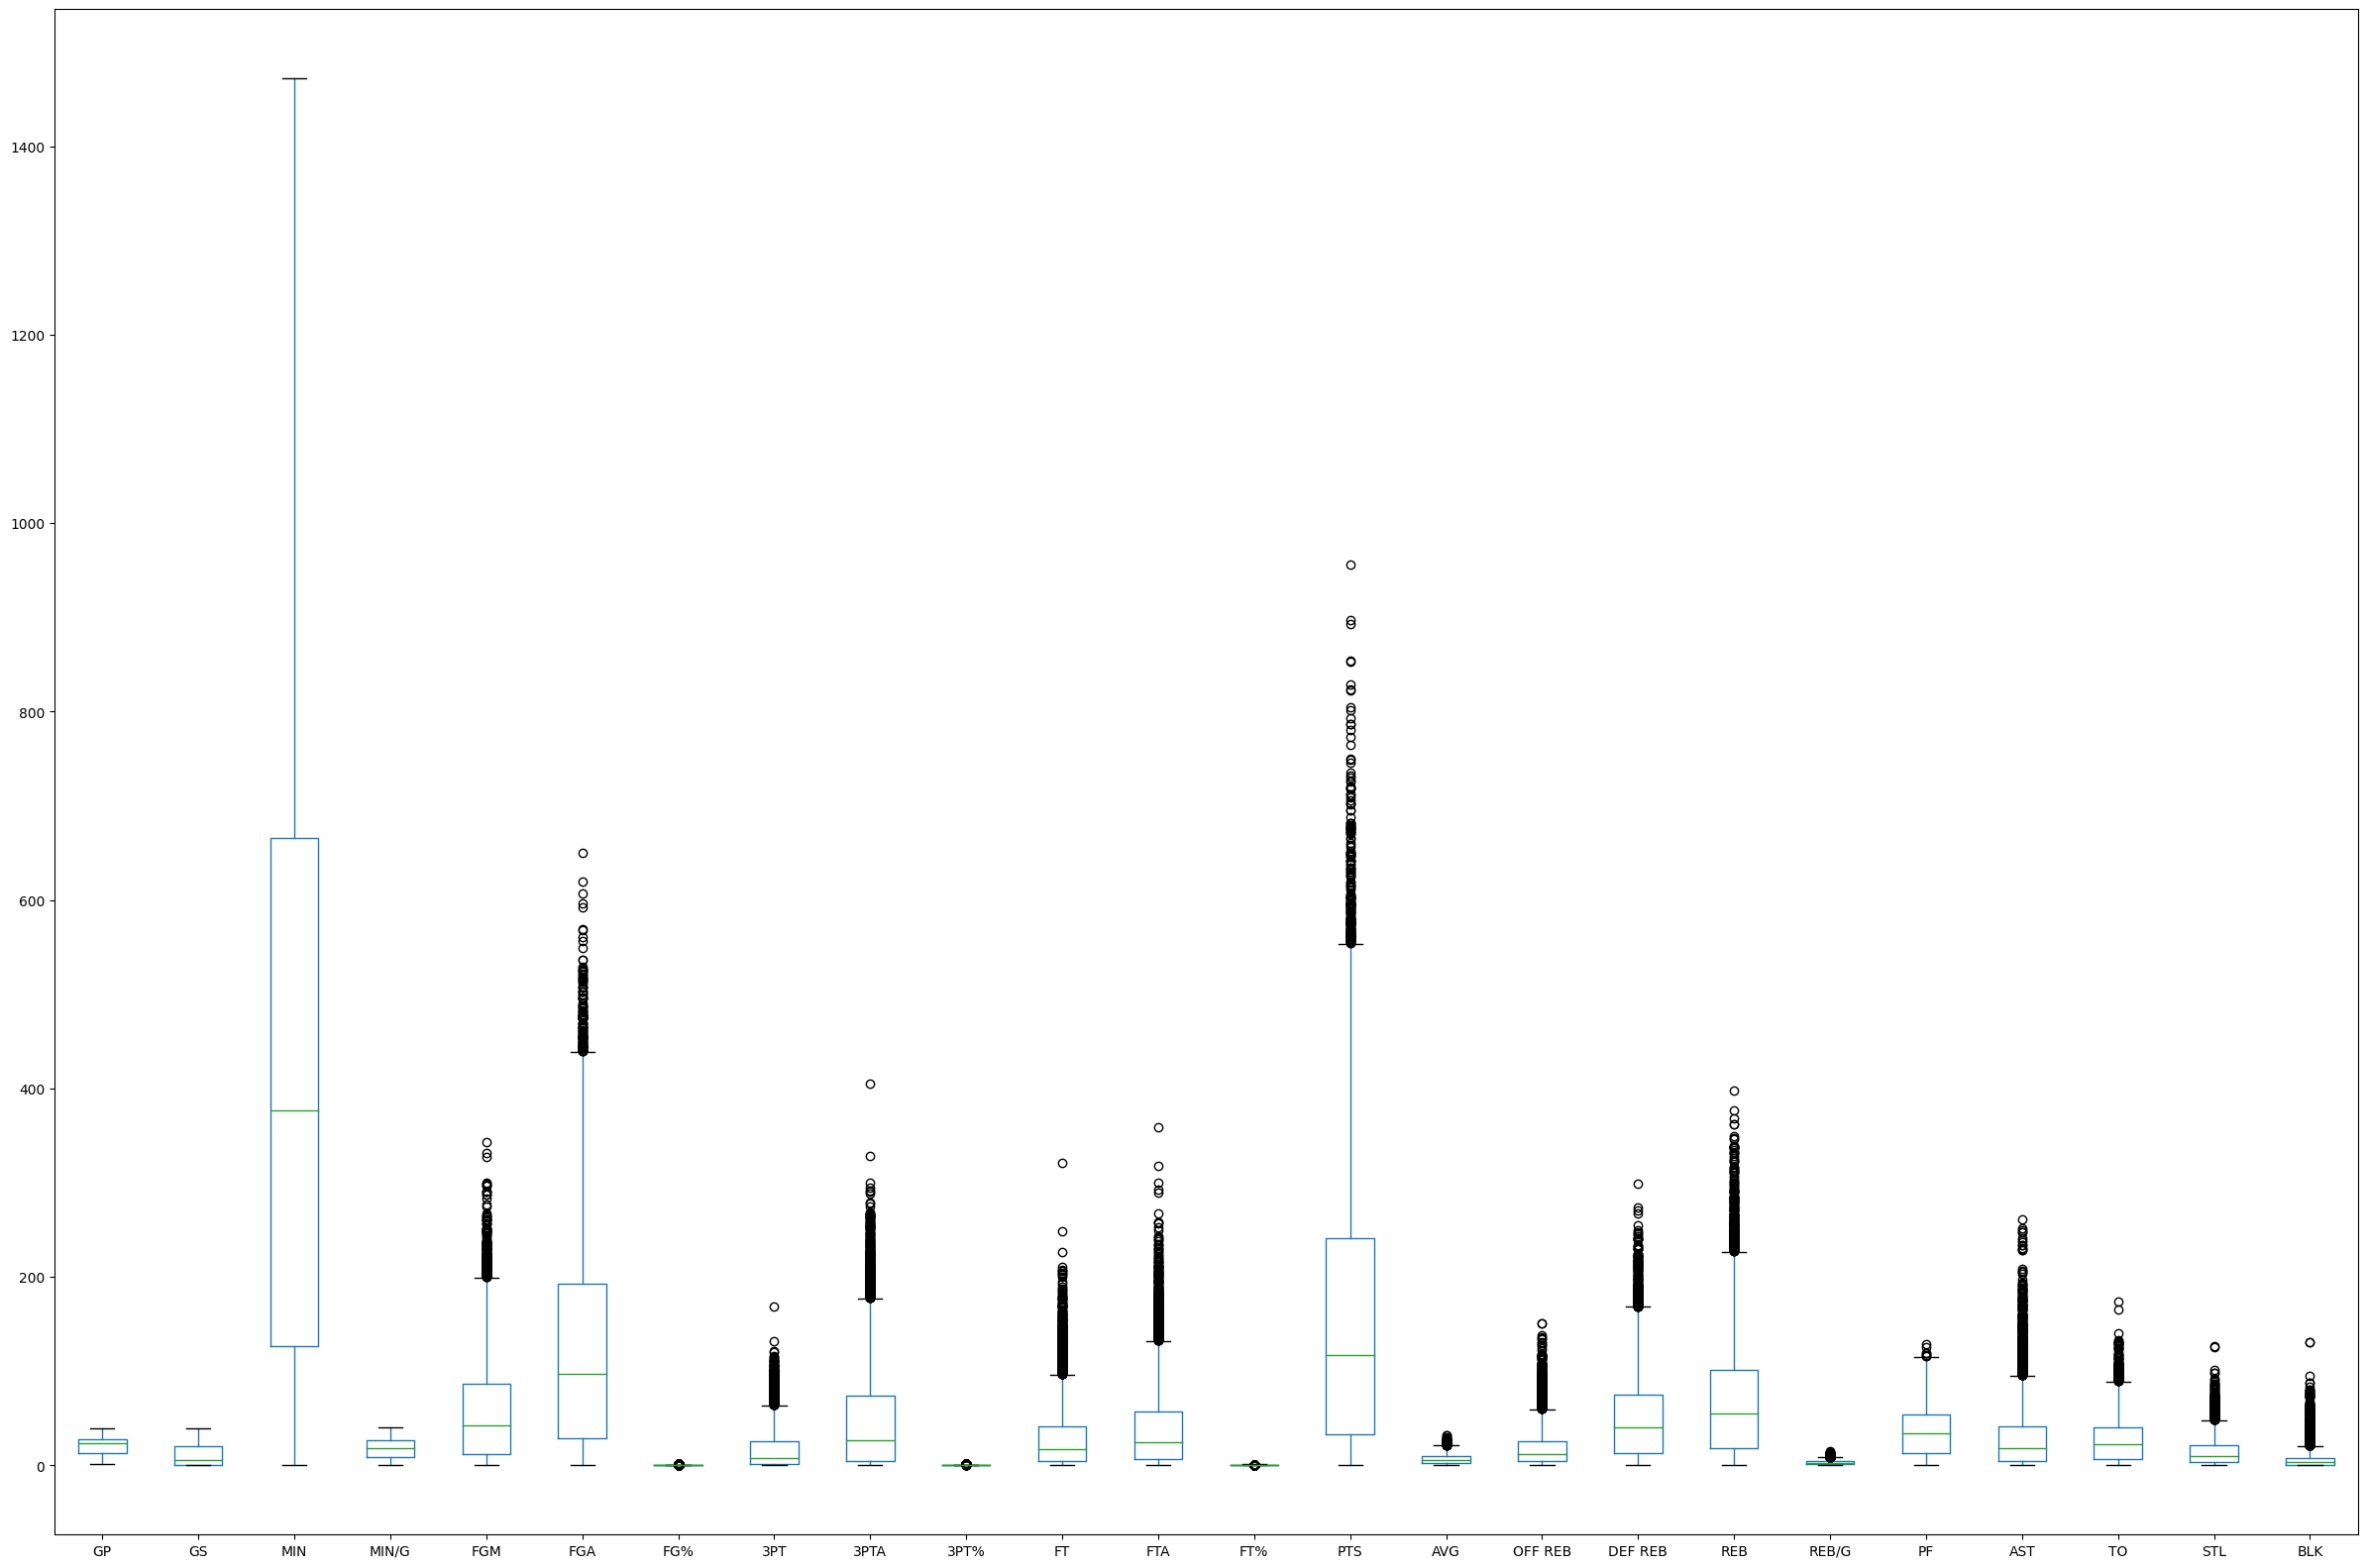

In [16]:
# plot the distributions of the continuous variables
plt.figure(figsize=(30, 20))
data_new.boxplot(column =list(data_new.columns[1:-3]), grid = False)

Now that we have an idea of what our data looks like, we will explore some of the relationships between the variables.

For example, let's visualize the relationship between 'MIN' (Minutes) and 'PTS' (Points) for each position type.

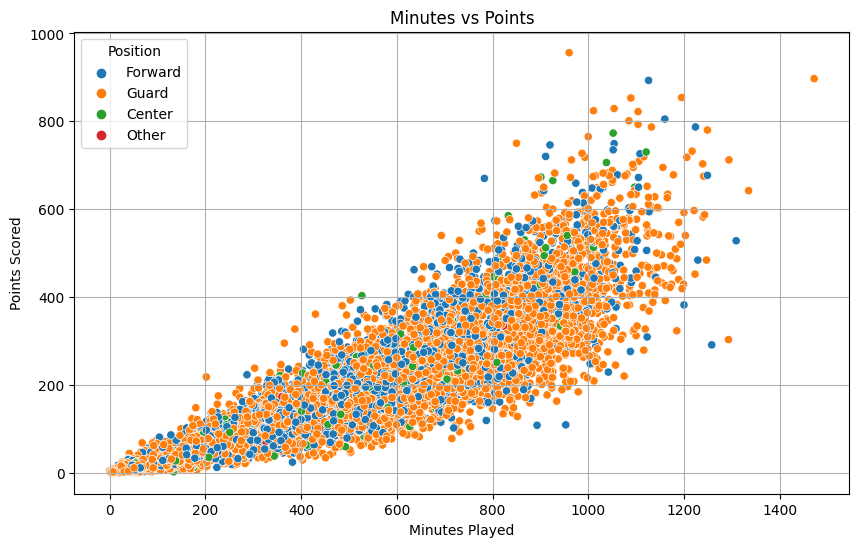

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='MIN', y='PTS', hue='Position')
plt.title('Minutes vs Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.grid(True)
plt.legend(title='Position')
plt.show()

We can also look at the distribution of the mean number of points for a given year.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


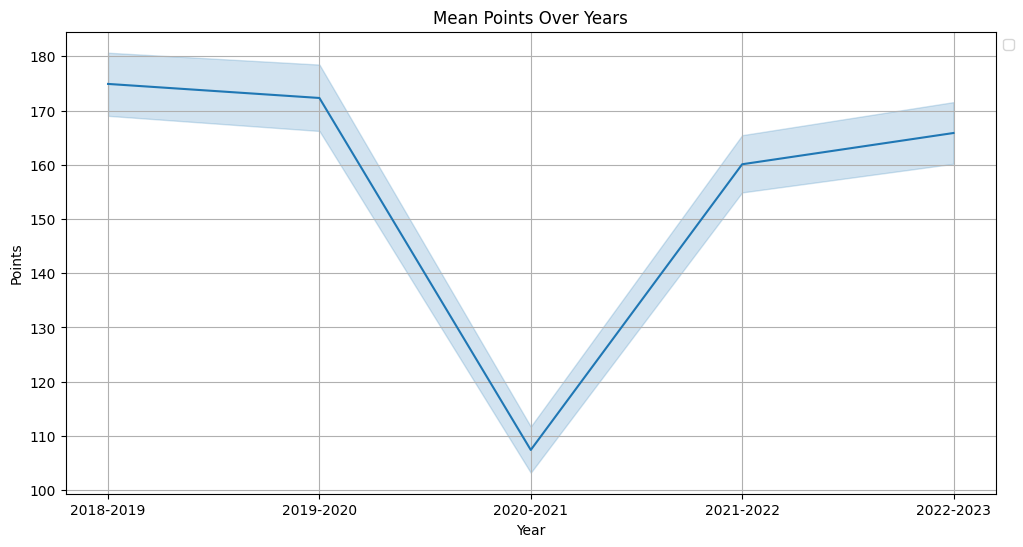

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_new, x='Year', y='PTS', estimator='mean')
plt.title('Mean Points Over Years')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [19]:
data_new.groupby("Year").count()["Player"]

Year
2018-2019    2585
2019-2020    2616
2020-2021    2458
2021-2022    2690
2022-2023    2679
Name: Player, dtype: int64

There seems to be an even distribution of years in our dataset. The number of observations for each year appear to be about the same. The dip in the number of points in 2020-2021 may be correlated with some other factor.

Speaking of correlations... we can take a look at how our variables relate to one another using a correlation matrix.

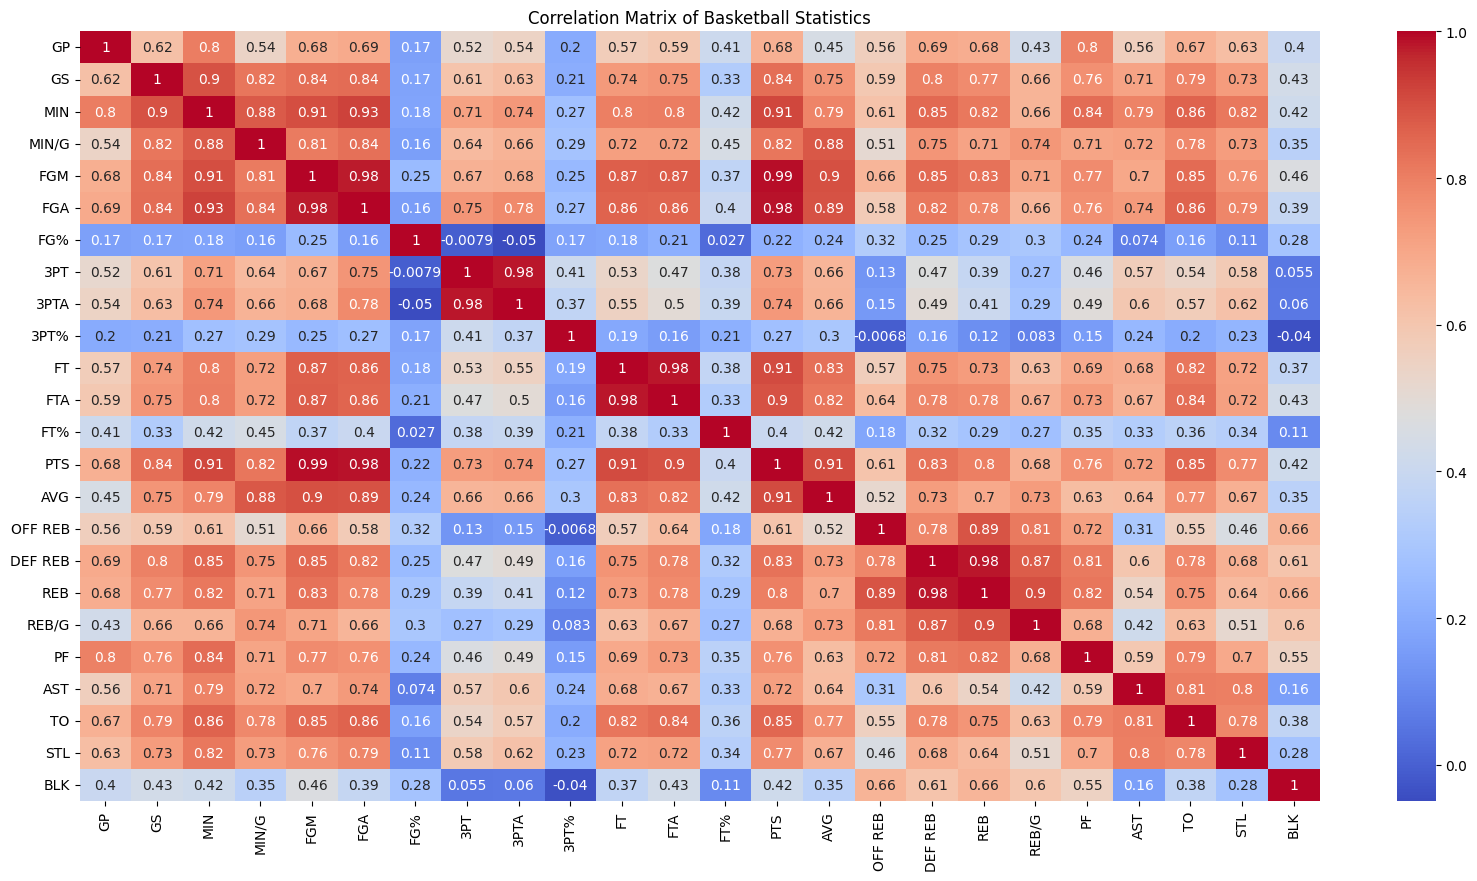

In [20]:
plt.figure(figsize=(20, 10))
corr_matrix = data_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Basketball Statistics')
plt.show()

There seems to be large variability in the strengths of the correlations. One correlation that appears to be relatively high is PTS and FGA. Let's graph these variables against each other to see what their relationship looks like.

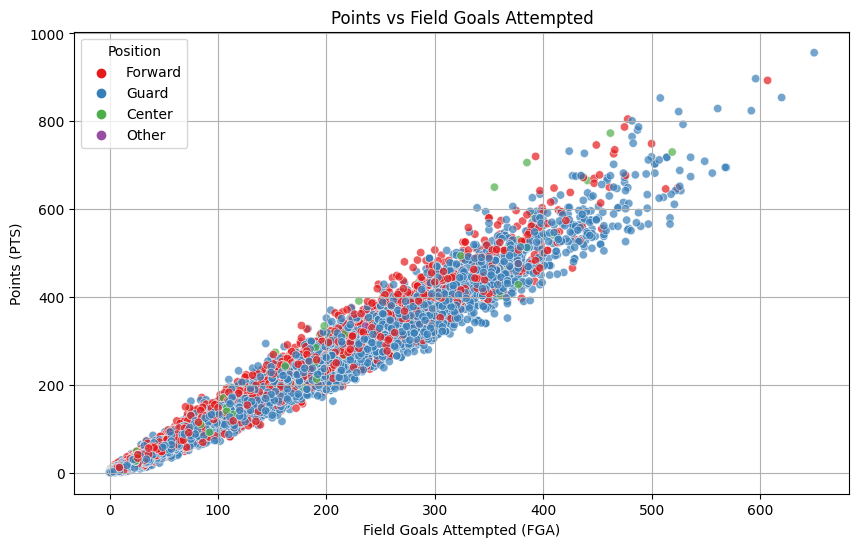

In [21]:
# Create scatterplot for PTS (Points) and FGA (Field Goals Attempted)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='FGA', y='PTS', hue='Position', palette='Set1', alpha=0.7)
plt.title('Points vs Field Goals Attempted')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Points (PTS)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

The relationship is strongly linear, with points increasing as FGA increases. This demonstrates the players' skills; they were able to obtain points for most of the field goal attempts they made.

Some other relationships that are commonly explored in basketball include FG% (Field Goals Percentage) and PTS (Points), AST (Assists) and TO (Turnovers), MIN (Minutes Played) and Rebounds (REB), Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%), and Offensive Rebounds (OFF REB) and Defensive Rebounds (DEF REB). These relationships can provide insight into the performances of the players and the team.

Comparing FG% and PTS helps assess a player's scoring efficiency. A player might score a lot of points, but if they have a low field goal percentage, it could indicate inefficient shot selection or poor shooting accuracy.

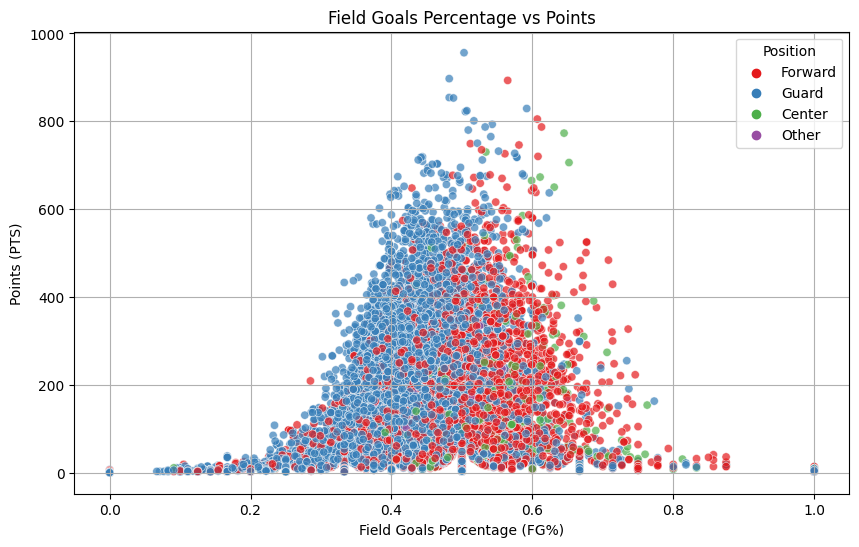

In [22]:
# Create scatterplot for FG% (Field Goals Percentage) and PTS (Points)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='FG%', y='PTS', hue='Position', palette='Set1', alpha=0.7)
plt.title('Field Goals Percentage vs Points')
plt.xlabel('Field Goals Percentage (FG%)')
plt.ylabel('Points (PTS)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

This follows a normal distribution. The distribution seems to differ based on the position played, though, with forwards having higher FG% and Guards having lower overall. The position may play a role on how many field goals a player can attempt.

Comparing AST and TO evaluates a player's playmaking ability and decision-making on the court. A high number of assists suggests good passing and playmaking skills, while a high number of turnovers indicates potential mistakes and turnovers that could hurt the team.

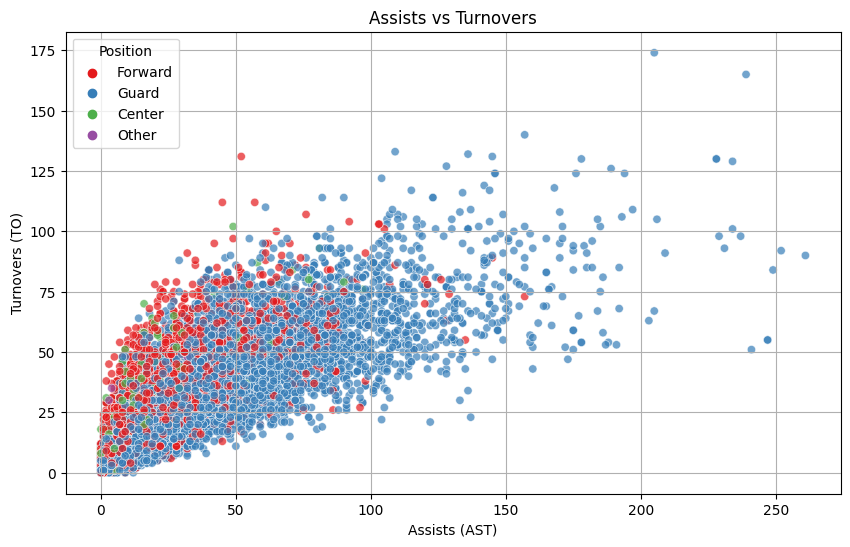

In [23]:
# Create scatterplot for AST (Assists) and TO (Turnovers)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='AST', y='TO', hue='Position', palette='Set1', alpha=0.7)
plt.title('Assists vs Turnovers')
plt.xlabel('Assists (AST)')
plt.ylabel('Turnovers (TO)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

As the number of assists increase, the number of turnovers also increase, but with more variation. Players tend to do higher assists within the range of 0 to 100, but lower turnovers, in range of 0 to 75. As is prefered, there are less players that do higher assists, but typically as the number of assists grows, so do turnovers. The stronger players would have higher assists and lower turnovers, which tend to be guards as well.

Comparing rebounds to minutes played helps assess a player's rebounding efficiency and effectiveness on the court. Players who grab a high number of rebounds in limited minutes are often considered impactful rebounders.

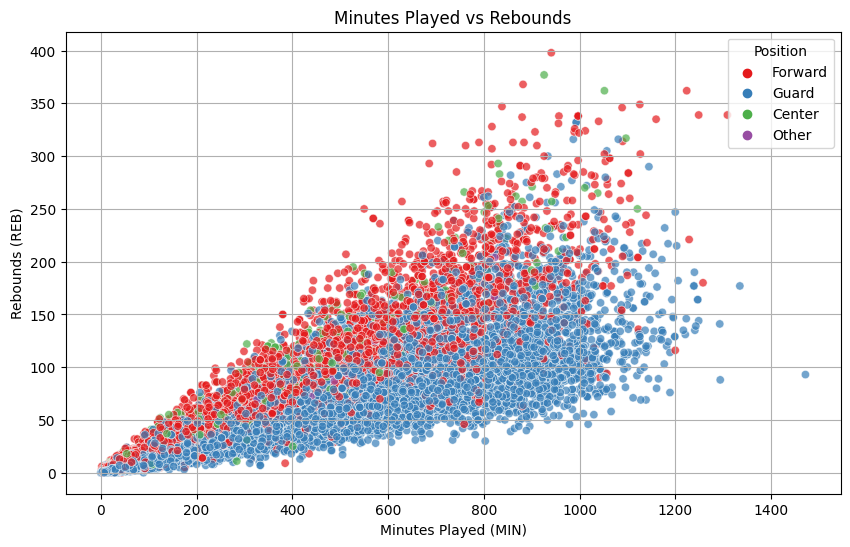

In [24]:
# Create scatterplot for MIN (Minutes Played) and Rebounds (REB)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='MIN', y='REB', hue='Position', palette='Set1', alpha=0.7)
plt.title('Minutes Played vs Rebounds')
plt.xlabel('Minutes Played (MIN)')
plt.ylabel('Rebounds (REB)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

Based on our description, the strongest players would be in the top part of the graph. These appear to be mostly forwards.

Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%) evaluate a player's three-point shooting proficiency and volume. A player who attempts a high number of three-point shots while maintaining a high three-point percentage is considered a valuable three-point shooter.

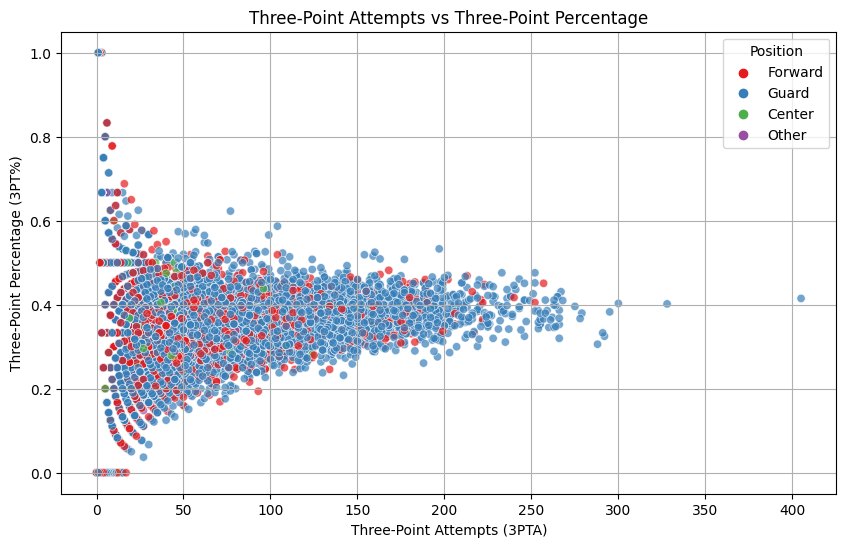

In [25]:
# Create scatterplot for Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='3PTA', y='3PT%', hue='Position', palette='Set1', alpha=0.7)
plt.title('Three-Point Attempts vs Three-Point Percentage')
plt.xlabel('Three-Point Attempts (3PTA)')
plt.ylabel('Three-Point Percentage (3PT%)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

There is more variation in 3PT% with lower 3PTA. Interestingly, as 3PTA increases, the 3PT% converges to 0.40. Perhaps this is the expected percentage of three-point throws from an average player.

Comparing offensive rebounds to defensive rebounds provides insights into a player's rebounding versatility and ability to secure possessions for their team on both ends of the court.

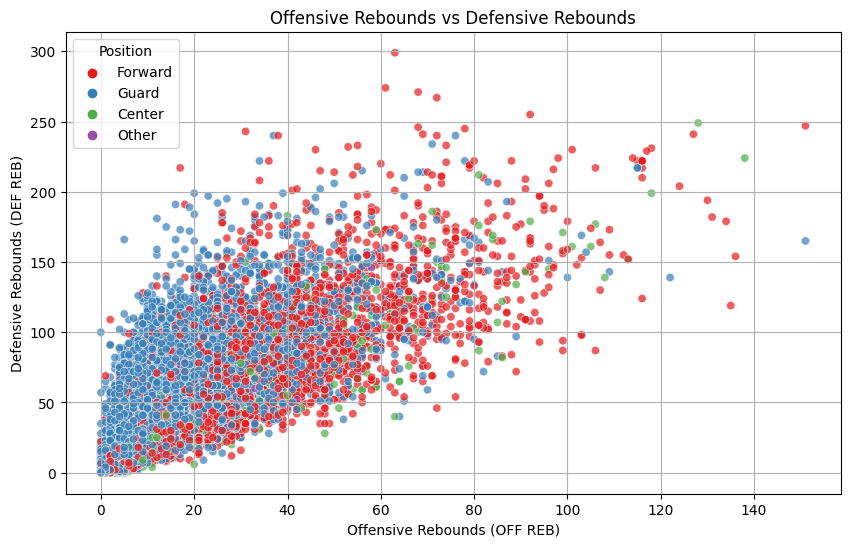

In [26]:
# Create scatterplot for Offensive Rebounds (OFF REB) and Defensive Rebounds (DEF REB)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='OFF REB', y='DEF REB', hue='Position', palette='Set1', alpha=0.7)
plt.title('Offensive Rebounds vs Defensive Rebounds')
plt.xlabel('Offensive Rebounds (OFF REB)')
plt.ylabel('Defensive Rebounds (DEF REB)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

There is a lot of variability between these two variables. Most guards tend to be very stronger defensive rebound players but weaker offensive rebound players. Forwards seem to be the opposite, but with more variation.

Now that have explored our data and player performance, we want to make a predictive model that can forecast a player's performance using past statistics. We implement this model in the following section.

#### Predictive Model

In [27]:
school_dict = pd.Series(schools['Conference'].values,index=schools['Name']).to_dict()
school_dict

{'Academy of Art University': 'Pacific West Conference',
 'Adams State University': 'Rocky Mountain Athletic Conference',
 'Adelphi University': 'Northeast-10 Conference',
 'Albany State University (Georgia)': 'Southern Intercol. Ath. Conf.',
 'Allen University': 'Southern Intercol. Ath. Conf.',
 'American International College': 'Northeast-10 Conference',
 'Anderson University (South Carolina)': 'South Atlantic Conference',
 'Angelo State University': 'Lone Star Conference',
 'Arkansas Tech University': 'Great American Conference',
 'Ashland University': 'Great Midwest Athletic Conference',
 'Assumption University': 'Northeast-10 Conference',
 'Auburn University at Montgomery': 'Gulf South Conference',
 'Augusta University': 'Peach Belt Conference',
 'Augustana University (South Dakota)': 'Northern Sun Intercollegiate Conference',
 'Azusa Pacific University': 'Pacific West Conference',
 'Barry University': 'Sunshine State Conference',
 'Barton College': 'Conference Carolinas',
 'Bella

In [28]:
d1_school_dict = pd.Series(d1_schools['Conference'].values,index=d1_schools['School']).to_dict()
d1_school_dict

{'Abilene Christian University': 'Western Athletic Conference',
 'Alabama A&M University': 'Southwestern Athletic Conference',
 'Alabama State University': 'Southwestern Athletic Conference',
 'Alcorn State University': 'Southwestern Athletic Conference',
 'American University': 'Patriot League',
 'Appalachian State University': 'Sun Belt Conference',
 'Arizona State University': 'Pacific-12 Conference',
 'Arkansas State University': 'Sun Belt Conference',
 'Auburn University': 'Southeastern Conference',
 'Austin Peay State University': 'ASUN Conference',
 'Ball State University': 'Mid-American Conference',
 'Baylor University': 'Big 12 Conference',
 'Bellarmine University': 'ASUN Conference',
 'Belmont University': 'Missouri Valley Conference',
 'Bethune-Cookman University': 'Southwestern Athletic Conference',
 'Boise State University': 'Mountain West Conference',
 'Boston College': 'Atlantic Coast Conference',
 'Boston University': 'Patriot League',
 'Bowling Green State University':

In [29]:
d1_schools['Conference'].unique()

array(['Western Athletic Conference', 'Southwestern Athletic Conference',
       'Patriot League', 'Sun Belt Conference', 'Pacific-12 Conference',
       'Southeastern Conference', 'ASUN Conference',
       'Mid-American Conference', 'Big 12 Conference',
       'Missouri Valley Conference', 'Mountain West Conference',
       'Atlantic Coast Conference', 'West Coast Conference', 'Ivy League',
       'American East Conference', 'Big East Conference',
       'Big Sky Conference', 'Big West Conference',
       'Big South Conference', 'Metro Atlantic Athletic Conference',
       'Northeast Conference', 'Ohio Valley Conference', 'Horizon League',
       'Colonial Athletic Association', 'Mid-Eastern Athletic Conference',
       'Atlantic 10 conference', 'Misouri Valley Conference',
       'Altantic 10 Conference', 'American Athletic Conference',
       'Southern Conference', 'Asun Conference',
       'The american athletic Conference', 'Atlantic Sun Conference',
       'Conference USA', 'Atla

In [30]:
conference_scores = {
    "Pacific West Conference": 0.75,
    "Rocky Mountain Athletic Conference": 0.75,
    "Northeast-10 Conference": 0.75,
    "Southern Intercol. Ath. Conf.": 0.75,
    "South Atlantic Conference": 0.75,
    "Lone Star Conference": 0.75,
    "Great American Conference": 0.75,
    "Great Midwest Athletic Conference": 0.75,
    "Gulf South Conference": 0.75,
    "Peach Belt Conference": 0.75,
    "Northern Sun Intercollegiate Conference": 0.75,
    "Sunshine State Conference": 0.75,
    "Conference Carolinas": 0.75,
    "Atlantic Sun Conference": 1,
    "Central Atlantic Collegiate Conference": 0.75,
    "Pennsylvania State Athletic Conference": 0.75,
    "Central Intercollegiate Athletic Association": 0.75,
    "California Collegiate Athletic Association": 0.75,
    "Great Northwest Athletic Conference": 0.75,
    "East Coast Conference": 0.75,
    "Mountain East Conference": 0.75,
    "Great Lakes Intercollegiate Athletic Conference": 0.75,
    "Great Lakes Valley Conference": 0.75,
    "Mid-America Intercollegiate Athletics Association": 0.75,
    "Northeast Conference": 0.75,
    "Ohio Valley Conference": 0.75,
    "American Southwest Conference": 0.75,
    "Western Athletic Conference": 1.1,
    "Southland Conference": 0.75,
    "Big West Conference": 1
}

In [31]:
d1_conference_scores = {
    "Atlantic Coast Conference": 2,
    "Southeastern Conference": 1.9,
    "Big 12 Conference": 1.9,
    "Big Ten Conference": 1.9,
    "Pacific-12 Conference": 1.8,
    "Big East Conference": 1.8,
    "American Athletic Conference": 1.5,
    "The american athletic Conference": 1.5,  # Exact spelling from original data
    "Mountain West Conference": 1.5,
    "Atlantic 10 Conference": 1.4,
    "Atlantic 10 conference": 1.4,  # Exact spelling from original data
    "Altantic 10 Conference": 1.4,  # Exact spelling from original data
    "Atlantic Ten Conference": 1.4,  # Exact spelling from original data
    "West Coast Conference": 1.4,
    "Missouri Valley Conference": 1.3,
    "Misouri Valley Conference": 1.3,  # Exact spelling from original data
    "Conference USA": 1.2,
    "Mid-American Conference": 1.1,
    "Sun Belt Conference": 1.1,
    "Sunbelt Conference": 1.1,  # Exact spelling from original data
    "Western Athletic Conference": 1.1,  # Also appeared in D2 data
    "Southern Conference": 1,
    "Ivy League": 1,
    "Horizon League": 1,
    "Metro Atlantic Athletic Conference": 1,
    "Colonial Athletic Association": 1,
    "Northeast Conference": 1,
    "Ohio Valley Conference": 1,
    "Patriot League": 1,
    "Big Sky Conference": 1,
    "Big West Conference": 1,
    "Big South Conference": 1,
    "America East Conference": 1,
    "American East Conference": 1,  # Exact spelling from original data
    "Atlantic Sun Conference": 1,
    "ASUN Conference": 1,
    "Asun Conference": 1,  # Exact spelling from original data
    "Summit League": 1,
    "The Summit League": 1,  # Exact spelling from original data
    "Summit League Conference": 1,  # This variation might be an over-specification
    "Southland Conference": 1,
    "Mid-Eastern Athletic Conference": 1,
    "Southwestern Athletic Conference": 1,
    "Division I-A Independents": 1,
    # Note for conferences listed as Division 2 in the provided data
    "Gulf South Conference": 1,  # D2 conference included here for completeness
    "Lone Star Conference": 1,  # D2 conference included here for completeness
}

In [32]:
data['Conference'] = data['Team'].map(school_dict)
data['Conference_Grade'] = data['Conference'].map(conference_scores).fillna(0.5)
data

/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_39544/3301583854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Conference'] = data['Team'].map(school_dict)
/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_39544/3301583854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Conference_Grade'] = data['Conference'].map(conference_scores).fillna(0.5)


,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,68,24,61,21,6,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,51,22,34,13,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,7,6,1,2,0,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,56,28,28,22,2,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,62,91,62,26,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15632,Josh Petteno,27,25,804,29.8,89,214,0.416,45,118,...,49,42,32,27,10,G,Young Harris College,2022-2023,Conference Carolinas,0.75
15633,Paul Hosey,29,24,389,13.4,45,82,0.549,11,29,...,35,11,26,2,6,F,Young Harris College,2022-2023,Conference Carolinas,0.75
15634,Nate Dunlop,29,25,738,25.4,86,209,0.411,55,141,...,41,37,16,13,6,F,Young Harris College,2022-2023,Conference Carolinas,0.75
15635,Brayden Baker,2,0,7,3.5,1,3,0.333,0,1,...,0,1,1,0,0,G,Young Harris College,2022-2023,Conference Carolinas,0.75


In [33]:
d1_data['Conference'] = d1_data['Team'].map(d1_school_dict)
d1_data['Conference_Grade'] = d1_data['Conference'].map(d1_conference_scores).fillna(1)
d1_data

/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_39544/3577667694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_data['Conference'] = d1_data['Team'].map(d1_school_dict)
/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_39544/3577667694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_data['Conference_Grade'] = d1_data['Conference'].map(d1_conference_scores).fillna(1)


,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Jaylen Franklin,1,1,30,30.0,5,9,0.556,0,1,...,3,1,4,1,0,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
1,Jaren Lewis,1,1,31,31.0,5,13,0.385,4,8,...,1,3,2,1,0,F,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
2,Damien Daniels,1,1,31,31.0,3,9,0.333,2,7,...,0,1,0,0,1,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
3,Payten Ricks,23,23,503,21.9,113,239,0.473,29,77,...,71,22,46,16,22,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
4,Tobias Cameron,33,8,504,15.3,25,61,0.410,16,36,...,47,20,18,14,1,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,15,3,7,4,2,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11146,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,1,0,2,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11147,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11148,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0


In [34]:
data = pd.concat([data, d1_data]).reset_index(drop=True)
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,68,24,61,21,6,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,51,22,34,13,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,7,6,1,2,0,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,56,28,28,22,2,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,62,91,62,26,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,15,3,7,4,2,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22327,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,1,0,2,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22328,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22329,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00


In [35]:
data['PPG'] = data['PTS'] / data['GP']
data['TO/G'] = data['TO'] / data['GP']
data['PF/G'] = data['PF'] / data['GP']
data['STL/G'] = data['STL'] / data['GP']
data['BLK/G'] = data['BLK'] / data['GP']
data['OFF_REB/G'] = data['OFF REB'] / data['GP']
data['DEF_REB/G'] = data['DEF REB'] / data['GP']
data['AST/G'] = data['AST'] / data['GP']
data = data[['Player', 'GP', 'GS', 'MIN', 'MIN/G', 'FGM', 'FGA', 'FG%', '3PT',
       '3PTA', '3PT%', 'FT', 'FTA', 'FT%', 'PTS', 'AVG', 'OFF REB', 'DEF REB', 'OFF_REB/G', 'DEF_REB/G',
       'REB', 'REB/G', 'PF', 'AST', 'TO', 'STL', 'BLK', 'PPG', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G', 'Position', 'Team',
       'Year', 'Conference', 'Conference_Grade']]
data = data.fillna(0)
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,AST/G,TO/G,PF/G,STL/G,BLK/G,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,1.043478,2.652174,2.956522,0.913043,0.260870,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,0.785714,1.214286,1.821429,0.464286,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,0.428571,0.071429,0.500000,0.142857,0.000000,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,1.217391,1.217391,2.434783,0.956522,0.086957,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,3.250000,2.214286,2.214286,0.928571,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,0.187500,0.437500,0.937500,0.250000,0.125000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22327,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,0.000000,1.000000,0.500000,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22328,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,0.260870,0.347826,0.782609,0.130435,0.043478,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22329,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,0.000000,0.000000,0.333333,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00


In [36]:
data['Occurrence'] = data.groupby(['Player', 'Team']).cumcount() + 1
data = data[['Player', 'GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%',
       'OFF_REB/G', 'DEF_REB/G', 'REB/G', 'PPG', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G', 'Position',
       'Team', 'Year', 'Conference', 'Conference_Grade', 'Occurrence']]
data

,Player,GP,GS,MIN/G,FG%,3PT%,FT%,OFF_REB/G,DEF_REB/G,REB/G,...,TO/G,PF/G,STL/G,BLK/G,Position,Team,Year,Conference,Conference_Grade,Occurrence
0,Andrija Blatancic,23,19,30.3,0.542,0.111,0.648,2.739130,6.043478,8.8,...,2.652174,2.956522,0.913043,0.260870,F,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
1,Dante Williams,28,1,14.6,0.477,0.333,0.656,0.178571,1.250000,1.4,...,1.214286,1.821429,0.464286,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
2,Chance Maxwell,14,0,4.4,0.500,0.000,0.000,0.142857,0.071429,0.2,...,0.071429,0.500000,0.142857,0.000000,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
3,Cole Morgan,23,9,16.2,0.365,0.250,0.656,1.260870,2.478261,3.7,...,1.217391,2.434783,0.956522,0.086957,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
4,Cobe Williams,28,27,26.5,0.417,0.351,0.778,0.321429,0.964286,1.3,...,2.214286,2.214286,0.928571,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,7.8,0.579,0.000,0.619,1.250000,0.687500,1.9,...,0.437500,0.937500,0.250000,0.125000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,4
22327,Ariel Bland,2,0,3.5,0.000,0.000,0.000,0.000000,1.500000,1.5,...,1.000000,0.500000,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,1
22328,Matija Belic,23,0,6.7,0.438,0.182,0.455,0.217391,0.565217,0.8,...,0.347826,0.782609,0.130435,0.043478,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,1
22329,David Pickles,3,0,1.7,0.500,0.000,0.500,0.333333,0.000000,0.3,...,0.000000,0.333333,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,2


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        return self.network(x)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

losses = []

models = {}
corrected_numerical_cols = ['GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%', 'PPG', 'REB/G', 'OFF_REB/G', 'DEF_REB/G', 'PF/G', 'AST/G', 'TO/G', 'STL/G', 'BLK/G']

features = ['Player', 'GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%', 'PPG', 'OFF_REB/G', 'DEF_REB/G', 'REB/G', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G',
            'Position', 'Team', 'Conference', 'Conference_Grade', 'Occurrence']
target = 'GP'
zero_counts = data.apply(lambda row: (row == 0).sum(), axis=1)
data = data[zero_counts <= 10]
data = data.sort_values(by='Year').reset_index(drop=True)

for col in corrected_numerical_cols:
    features_copy = [val for val in features if val != col]
    X = data[features_copy]
    y = data[col]

    categorical_features = ['Player', 'Position', 'Team', 'Conference']
    data['Player'] = data['Player'].astype(str)
    data['Position'] = data['Position'].astype(str)
    data['Team'] = data['Team'].astype(str)
    data['Conference'] = data['Conference'].astype(str)

    train_data = data[data['Year'] != '2022-2023']
    test_data = data[data['Year'] == '2022-2023']

    X_train = train_data[features]
    y_train = train_data[col]
    X_test = test_data[features]
    y_test = test_data[col]

    numerical_features = [feature for feature in features if feature not in categorical_features]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    preprocessor.fit(X_train)

    X_train_transformed = preprocessor.transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    X_train_transformed.shape, X_test_transformed.shape

    X_train_tensor = torch.tensor(X_train_transformed.toarray().astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
    X_test_tensor = torch.tensor(X_test_transformed.toarray().astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = MLP(input_size=X_train_transformed.shape[1], output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            loss = running_loss/len(train_loader)
            losses.append(loss)
        print(f'Epoch {epoch+1}, Loss: {loss}, Column: {col}')

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).squeeze()
        test_loss = criterion(predictions, y_test_tensor)
        print(f'Test Loss: {test_loss.item()}')
    models[col] = model

Epoch 1, Loss: 97.58698195446539, Column: GP
Epoch 2, Loss: 0.41110984253064364, Column: GP
Epoch 3, Loss: 0.13890137964191326, Column: GP
Epoch 4, Loss: 0.08274149748262104, Column: GP
Epoch 5, Loss: 0.07240822373796965, Column: GP
Epoch 6, Loss: 0.08000182238130168, Column: GP
Epoch 7, Loss: 0.09666794404842471, Column: GP
Epoch 8, Loss: 0.11874746178625194, Column: GP
Epoch 9, Loss: 0.1347255135196766, Column: GP
Epoch 10, Loss: 0.14169084186886102, Column: GP
Epoch 11, Loss: 0.13436892458045754, Column: GP
Epoch 12, Loss: 0.11728797756306088, Column: GP
Epoch 13, Loss: 0.11013495306420418, Column: GP
Epoch 14, Loss: 0.10672416272111067, Column: GP
Epoch 15, Loss: 0.10516635567404842, Column: GP
Epoch 16, Loss: 0.1067035305420406, Column: GP
Epoch 17, Loss: 0.10225208403670606, Column: GP
Epoch 18, Loss: 0.0992395614508454, Column: GP
Epoch 19, Loss: 0.08901856654814182, Column: GP
Epoch 20, Loss: 0.0930658002447991, Column: GP
Test Loss: 0.1982821375131607
Epoch 1, Loss: 44.6770767

In [44]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

X_test = X_test[X_test['Occurrence'] > 1].reset_index(drop=True)
random_index = np.random.randint(0, len(X_test))
# # Ensure the model is in evaluation mode
print(f"Player Name: {X_test.iloc[random_index]['Player']}, School: {X_test.iloc[random_index]['Team']}")
for col, model in models.items():
    model.eval()

    selected_features = X_test.iloc[random_index:random_index+1].reset_index(drop=True)
    #previous_year = X_train[(X_train['Player'] == selected_features['Player'][0]) & (X_train['Position'] == selected_features['Position'][0]) & (X_train['Occurrence'] == (selected_features['Occurrence'][0] - 1))]
    previous_year = X_train[(X_train['Player'] == selected_features['Player'][0]) & (X_train['Occurrence'] == (selected_features['Occurrence'][0] - 1))]
    all_numerical_data = X_train[corrected_numerical_cols]

    scaler = StandardScaler()
    scaled_all_data = scaler.fit_transform(all_numerical_data)
    scaled_player_data = scaler.transform(previous_year[corrected_numerical_cols])

    similarities = cosine_similarity(scaled_player_data, scaled_all_data)[0]
    top_indices = np.argsort(-similarities)[1:150+1]


    similar_players = X_train.iloc[top_indices]#.median()#.values#np.append(X_test.iloc[top_indices].median().values, [1,1,1,1])#[previous_year[['Player', 'Position', 'Team', 'Conference']]])

    next_year = pd.DataFrame(columns=similar_players.columns)
    similar_players_copy = similar_players.copy().reset_index(drop=True)
    for i in range(len(similar_players)):
        player_next_year = X_train[
            (X_train['Player'] == similar_players_copy.iloc[i]['Player']) &
            (X_train['Team'] == similar_players_copy.iloc[i]['Team']) &
            (X_train['Occurrence'] == similar_players_copy.iloc[i]['Occurrence'] + 1)
        ]

        if not player_next_year.empty:
            next_year = next_year.append(player_next_year, ignore_index=True)
    similar_players = next_year.median()
    similar_players_df = similar_players.to_frame().transpose()
    similar_players_df.reset_index(drop=True, inplace=True)

    previous_year_copy = previous_year.copy().reset_index(drop=True)

    similar_players_df['Player'] = previous_year_copy.loc[0, 'Player']
    similar_players_df['Position'] = previous_year_copy.loc[0, 'Position']
    similar_players_df['Team'] = previous_year_copy.loc[0, 'Team']
    similar_players_df['Conference'] = previous_year_copy.loc[0, 'Conference']
    similar_players_df['Conference_Grade'] = previous_year_copy.loc[0, 'Conference_Grade']
    # train_similar_dict[str(i)] = [top_indices]
    #similar_players_reshaped = similar_players.reshape(1, -1)
    #['Player'] +
    selected_features_transformed = preprocessor.transform(similar_players_df)

    selected_features_tensor = torch.tensor(selected_features_transformed.toarray().astype(np.float32))
    with torch.no_grad():
        prediction = model(selected_features_tensor).item()
        if prediction < 0:
            prediction = 0
    print(f"Predicted '{col}' for the selected instance: {prediction}")
    actual_value = X_test.iloc[random_index][col]
    print(f"Actual '{col}' for the selected instance: {actual_value}")

Player Name: Mekhi Perry, School: Eckerd College
Predicted 'GP' for the selected instance: 17.234373092651367
Actual 'GP' for the selected instance: 25
Predicted 'GS' for the selected instance: 0.7559471130371094
Actual 'GS' for the selected instance: 0
Predicted 'MIN/G' for the selected instance: 10.445602416992188
Actual 'MIN/G' for the selected instance: 14.9
Predicted 'FG%' for the selected instance: 0.37108439207077026
Actual 'FG%' for the selected instance: 0.421
Predicted '3PT%' for the selected instance: 0.28645429015159607
Actual '3PT%' for the selected instance: 0.373
Predicted 'FT%' for the selected instance: 0.5910071730613708
Actual 'FT%' for the selected instance: 0.87
Predicted 'PPG' for the selected instance: 2.9396090507507324
Actual 'PPG' for the selected instance: 5.4
Predicted 'REB/G' for the selected instance: 1.213432788848877
Actual 'REB/G' for the selected instance: 1.6
Predicted 'OFF_REB/G' for the selected instance: 0.3529881536960602
Actual 'OFF_REB/G' for th